In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
dic_ll = {'costheta_1': np.load('../processed_ntuples/singlewrf_reconstruction/LL/costheta_1_nr_source_ll.npy'),
           'costheta_2': np.load('../processed_ntuples/singlewrf_reconstruction/LL/costheta_2_nr_source_ll.npy'),
           'cos_cs': np.load('../processed_ntuples/collinssoper/costhetas_source_ll.npy'),
           'cos_th_1': np.load('../processed_ntuples/transverse_helicity/LL/cos_th_1_nr_source_ll.npy'),
           'cos_th_2': np.load('../processed_ntuples/transverse_helicity/LL/cos_th_2_nr_source_ll.npy'),
           'r_pt': np.load('../processed_ntuples/ratio_pt/Rpt_source_ll.npy')}
df_ll = pd.DataFrame(dic_ll)

dic_tl = {'costheta_1': np.load('../processed_ntuples/singlewrf_reconstruction/TL/costheta_1_nr_source_tl.npy'),
           'costheta_2': np.load('../processed_ntuples/singlewrf_reconstruction/TL/costheta_2_nr_source_tl.npy'),
           'cos_cs': np.load('../processed_ntuples/collinssoper/costhetas_source_tl.npy'),
           'cos_th_1': np.load('../processed_ntuples/transverse_helicity/TL/cos_th_1_nr_source_tl.npy'),
           'cos_th_2': np.load('../processed_ntuples/transverse_helicity/TL/cos_th_2_nr_source_tl.npy'),
           'r_pt': np.load('../processed_ntuples/ratio_pt/Rpt_source_tl.npy')}
df_tl = pd.DataFrame(dic_tl)

dic_tt = {'costheta_1': np.load('../processed_ntuples/singlewrf_reconstruction/TT/costheta_1_nr_source_tt.npy'),
           'costheta_2': np.load('../processed_ntuples/singlewrf_reconstruction/TT/costheta_2_nr_source_tt.npy'),
           'cos_cs': np.load('../processed_ntuples/collinssoper/costhetas_source_tt.npy'),
           'cos_th_1': np.load('../processed_ntuples/transverse_helicity/TT/cos_th_1_nr_source_tt.npy'),
           'cos_th_2': np.load('../processed_ntuples/transverse_helicity/TT/cos_th_2_nr_source_tt.npy'),
           'r_pt': np.load('../processed_ntuples/ratio_pt/Rpt_source_tt.npy')}
df_tt = pd.DataFrame(dic_tt)

In [3]:
features = list(df_tt.columns)
print(features)

['costheta_1', 'costheta_2', 'cos_cs', 'cos_th_1', 'cos_th_2', 'r_pt']


(array([ 7253.,  5261.,  4643.,  3885.,  3479.,  3185.,  2946.,  2766.,
         2581.,  2445.,  2345.,  2181.,  2136.,  2124.,  2112.,  2094.,
         1939.,  1971.,  1930.,  1942.,  1935.,  1954.,  1933.,  1874.,
         1968.,  2004.,  2000.,  1924.,  1972.,  1980.,  1948.,  2091.,
         2070.,  2095.,  2205.,  2244.,  2430.,  2403.,  2478.,  2685.,
         2744.,  2994.,  3280.,  3646.,  3890.,  4434.,  5443.,  6392.,
         8125., 10929.]),
 array([-9.99994814e-01, -9.59995091e-01, -9.19995368e-01, -8.79995644e-01,
        -8.39995921e-01, -7.99996197e-01, -7.59996474e-01, -7.19996750e-01,
        -6.79997027e-01, -6.39997303e-01, -5.99997580e-01, -5.59997857e-01,
        -5.19998133e-01, -4.79998440e-01, -4.39998716e-01, -3.99998993e-01,
        -3.59999269e-01, -3.19999546e-01, -2.79999822e-01, -2.40000099e-01,
        -2.00000376e-01, -1.60000652e-01, -1.20000929e-01, -8.00012052e-02,
        -4.00014818e-02, -1.75833702e-06,  3.99979651e-02,  7.99976885e-02,
         1

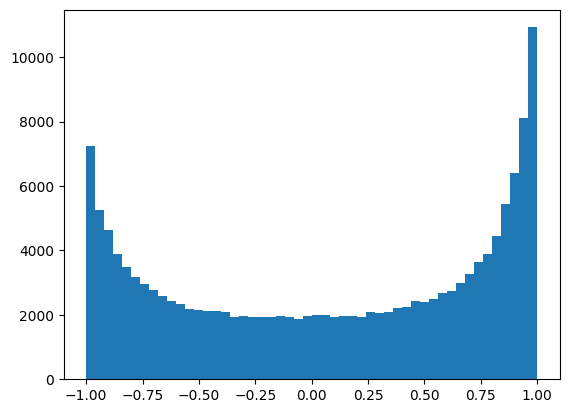

In [4]:
plt.hist(df_ll['cos_cs'], bins=50)

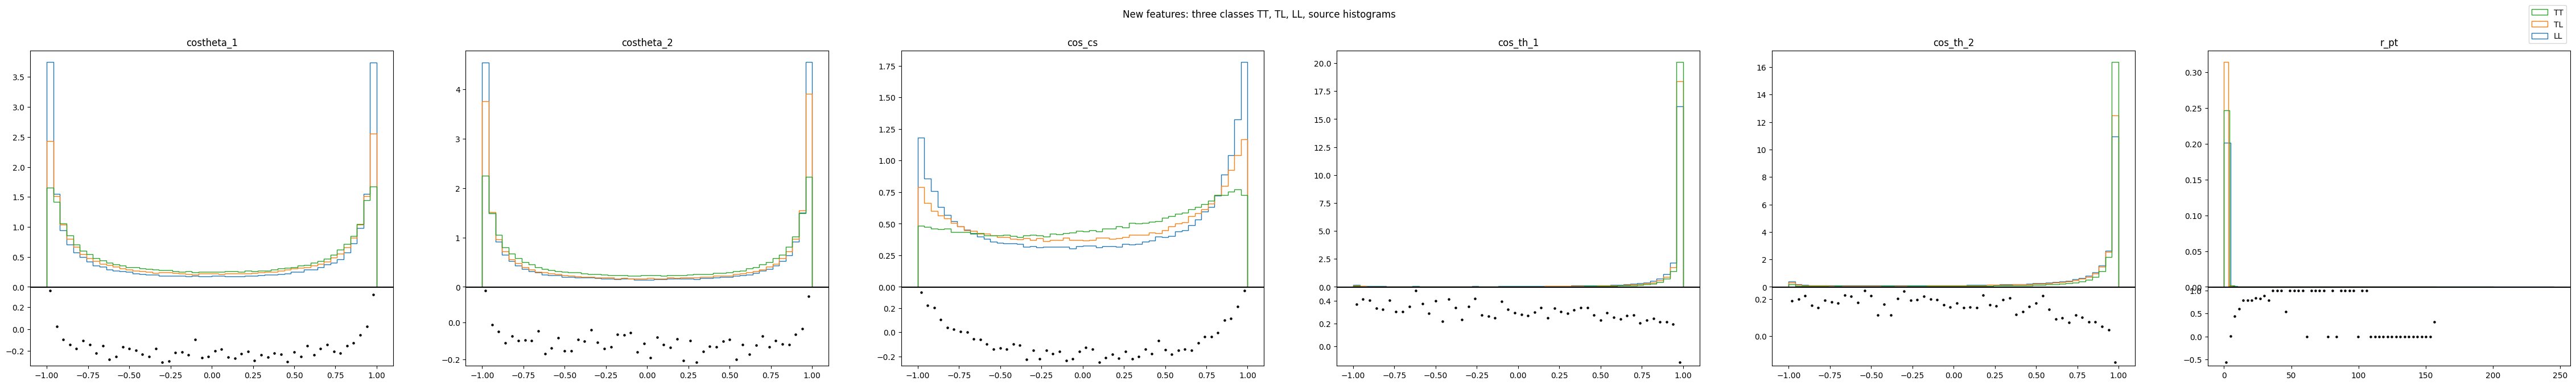

In [5]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(1.5*6*6.4, 1.5*4.8), gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.001}, sharex='col')

for i in range(6):
    bins_ll, edges_ll, hist_ll = ax[0,i].hist(df_ll[features[i]].to_numpy(), bins=50, density=True, histtype='step')
    bins_tl, edges_tl, hist_tl = ax[0,i].hist(df_tl[features[i]].to_numpy(), bins=50, density=True, histtype='step')
    bins_tt, edges_tt, hist_tt = ax[0,i].hist(df_tt[features[i]].to_numpy(), bins=50, density=True, histtype='step')
    # bins_tt, edges_tt, hist_tt = ax[0,i].hist([x for x in df_tt[features[i]].to_numpy() if x != 0.], bins=50, density=True, histtype='step')
    # bins_tl, edges_tl, hist_tl = ax[0,i].hist([x for x in df_tl[features[i]].to_numpy() if x != 0.], bins=50, density=True, histtype='step')
    # bins_ll, edges_ll, hist_ll = ax[0,i].hist([x for x in df_ll[features[i]].to_numpy() if x != 0.], bins=50, density=True, histtype='step')
    ax[0,i].set_title(features[i])
    edges_tl = [0.5*(e1+e2) for e1, e2 in zip(edges_tl[:-1], edges_tl[1:])]
    edges_tt = [0.5*(e1+e2) for e1, e2 in zip(edges_ll[:-1], edges_ll[1:])]
    pulls_tl = [(a-b)/(a+1.e-34) for a, b in zip(bins_ll, bins_tl)]
    pulls_tt = [(a-b)/(a+1.e-34) for a, b in zip(bins_ll, bins_tt)]
    pulls_tx = [(a-b)/(a+1.e-34) for a, b in zip(bins_ll, bins_tl+bins_tt)]
    ax[1,i].scatter(edges_tl, pulls_tl, s=5, color='k')

fig.suptitle('New features: three classes TT, TL, LL, source histograms')
fig.legend([hist_tt[0], hist_tl[0], hist_ll[0]], ['TT', 'TL', 'LL'], loc="upper right", bbox_to_anchor=(0.9,1.))
plt.show()
#plt.savefig('source_features.png')

In [6]:
# feature='cos_cs'

# for feature in features:
#     fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(1.2*6.4, 1.4*4.8), gridspec_kw={'height_ratios': [3, 1]}, sharex='col')
#     bins_ll, edges_ll, hist_ll = ax[0].hist(df_ll[feature].to_numpy(), bins=50, density=True, histtype='step')
#     bins_tl, edges_tl, hist_tl = ax[0].hist(df_tl[feature].to_numpy(), bins=50, density=True, histtype='step')
#     bins_tt, edges_tt, hist_tt = ax[0].hist(df_tt[feature].to_numpy(), bins=50, density=True, histtype='step')
#     ax[0].tick_params(labelbottom=True)
#     edges_tl = [0.5*(e1+e2) for e1, e2 in zip(edges_tl[:-1], edges_tl[1:])]
#     edges_tt = [0.5*(e1+e2) for e1, e2 in zip(edges_ll[:-1], edges_ll[1:])]
#     pulls_tl = [(a-b)/(b+1.e-34) for a, b in zip(bins_ll, bins_tl)]
#     pulls_tt = [(a-b)/(b+1.e-34) for a, b in zip(bins_ll, bins_tt)]
#     #pulls_tx = [(a-b)/(b+1.e-34) for a, b in zip(bins_ll, bins_tl+bins_tt)]
#     scatt_tt = ax[1].scatter(edges_tt, pulls_tt, s=5, color='green')
#     scatt_tl = ax[1].scatter(edges_tl, pulls_tl, s=5, color='orange')
#     #scatt_tx = ax[1].scatter(edges_tl, pulls_tx, s=5, color='red')
#     xmin, xmax = ax[1].get_xlim()
#     ax[1].hlines(0., xmin, xmax, color='k', alpha=0.5)
#     ax[1].set_xlim(xmin, xmax)
#     ax[1].set_ylim(-2.5, 2.5)
#     if max(np.concatenate((np.abs(pulls_tl), np.abs(pulls_tt)))) < 1.25:
#             ax[1].set_ylim(-1.25, 1.25)
#     if feature == 'r_pt': ax[0].set_ylim(0., 5.e-5)
#     fig.suptitle(f'{feature}\nsource histograms')
#     fig.legend([hist_ll[0], hist_tl[0], hist_tt[0]], ['LL', 'TL', 'TT'], loc="upper right", bbox_to_anchor=(0.9,1.))
#     plt.savefig(f'source/source_{feature}.png')
#     plt.show()

In [7]:
#

In [8]:
dic_ll = {'costheta_1': np.load('../processed_ntuples/singlewrf_reconstruction/LL/costheta_1_nr_norm_ll.npy'),
           'costheta_2': np.load('../processed_ntuples/singlewrf_reconstruction/LL/costheta_2_nr_norm_ll.npy'),
           'cos_cs': np.load('../processed_ntuples/collinssoper/costhetas_ll.npy'),
           'cos_th_1': np.load('../processed_ntuples/transverse_helicity/LL/cos_th_1_nr_ll.npy'),
           'cos_th_2': np.load('../processed_ntuples/transverse_helicity/LL/cos_th_2_nr_ll.npy'),
           'r_pt': np.load('../processed_ntuples/ratio_pt/Rpt_ll.npy')}
df_ll = pd.DataFrame(dic_ll)

dic_tl = {'costheta_1': np.load('../processed_ntuples/singlewrf_reconstruction/TL/costheta_1_nr_norm_tl.npy'),
           'costheta_2': np.load('../processed_ntuples/singlewrf_reconstruction/TL/costheta_2_nr_norm_tl.npy'),
           'cos_cs': np.load('../processed_ntuples/collinssoper/costhetas_tl.npy'),
           'cos_th_1': np.load('../processed_ntuples/transverse_helicity/TL/cos_th_1_nr_tl.npy'),
           'cos_th_2': np.load('../processed_ntuples/transverse_helicity/TL/cos_th_2_nr_tl.npy'),
           'r_pt': np.load('../processed_ntuples/ratio_pt/Rpt_tl.npy')}
df_tl = pd.DataFrame(dic_tl)

dic_tt = {'costheta_1': np.load('../processed_ntuples/singlewrf_reconstruction/TT/costheta_1_nr_norm_tt.npy'),
           'costheta_2': np.load('../processed_ntuples/singlewrf_reconstruction/TT/costheta_2_nr_norm_tt.npy'),
           'cos_cs': np.load('../processed_ntuples/collinssoper/costhetas_tt.npy'),
           'cos_th_1': np.load('../processed_ntuples/transverse_helicity/TT/cos_th_1_nr_tt.npy'),
           'cos_th_2': np.load('../processed_ntuples/transverse_helicity/TT/cos_th_2_nr_tt.npy'),
           'r_pt': np.load('../processed_ntuples/ratio_pt/Rpt_tt.npy')}
df_tt = pd.DataFrame(dic_tt)

In [9]:
features = list(df_tt.columns)
print(features)

['costheta_1', 'costheta_2', 'cos_cs', 'cos_th_1', 'cos_th_2', 'r_pt']


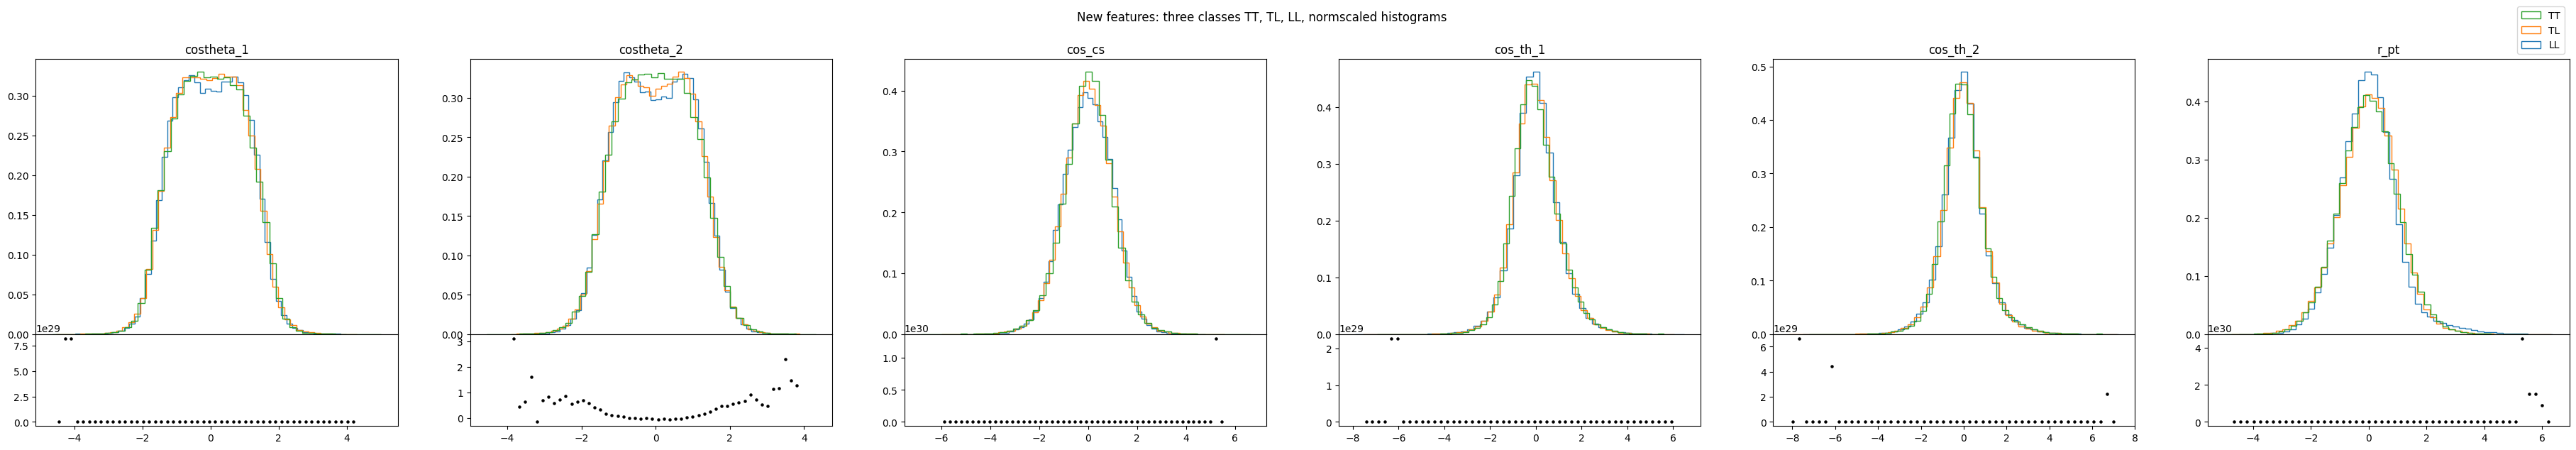

In [10]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(1.2*6*6.4, 1.4*4.8), gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.001}, sharex='col')

for i in range(6):
    bins_ll, edges_ll, hist_ll = ax[0,i].hist(df_ll[features[i]].to_numpy(), bins=50, density=True, histtype='step')
    bins_tl, edges_tl, hist_tl = ax[0,i].hist(df_tl[features[i]].to_numpy(), bins=50, density=True, histtype='step')
    bins_tt, edges_tt, hist_tt = ax[0,i].hist(df_tt[features[i]].to_numpy(), bins=50, density=True, histtype='step')
    # bins_tt, edges_tt, hist_tt = ax[0,i].hist([x for x in df_tt[features[i]].to_numpy() if x != 0.], bins=50, density=True, histtype='step')
    # bins_tl, edges_tl, hist_tl = ax[0,i].hist([x for x in df_tl[features[i]].to_numpy() if x != 0.], bins=50, density=True, histtype='step')
    # bins_ll, edges_ll, hist_ll = ax[0,i].hist([x for x in df_ll[features[i]].to_numpy() if x != 0.], bins=50, density=True, histtype='step')
    ax[0,i].set_title(features[i])
    edges_tl = [0.5*(e1+e2) for e1, e2 in zip(edges_tl[:-1], edges_tl[1:])]
    edges_tt = [0.5*(e1+e2) for e1, e2 in zip(edges_ll[:-1], edges_ll[1:])]
    pulls_tl = [(a-b)/(b+1.e-34) for a, b in zip(bins_ll, bins_tl)]
    pulls_tt = [(a-b)/(b+1.e-34) for a, b in zip(bins_ll, bins_tt)]
    pulls_tx = [(a-b)/(b+1.e-34) for a, b in zip(bins_ll, bins_tl+bins_tt)]
    ax[1,i].scatter(edges_tl, pulls_tl, s=5, color='k')
    

fig.suptitle('New features: three classes TT, TL, LL, normscaled histograms')
fig.legend([hist_tt[0], hist_tl[0], hist_ll[0]], ['TT', 'TL', 'LL'], loc="upper right", bbox_to_anchor=(0.9,1.))
plt.show()
#plt.savefig('source_features.png')

In [11]:
# import mplhep as hep
# hep.style.use("CMS")
# # Just experiment label and <text> such as 'Preliminary' or 'Simulation'
# hep.cms.text('Simulation')

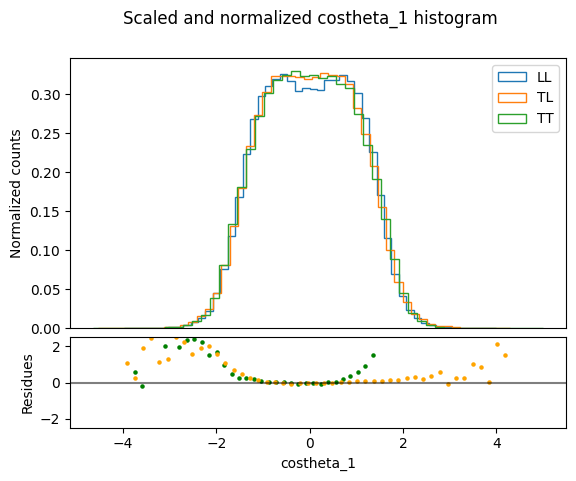

In [12]:
feature='costheta_1'

fig, ax = plt.subplots(ncols=1, nrows=2, gridspec_kw={'height_ratios': [3, 1]}, sharex='col') # figsize=(1.2*6.4, 1.4*4.8)
bins_ll, edges_ll, hist_ll = ax[0].hist(df_ll[feature].to_numpy(), bins=50, density=True, histtype='step')
bins_tl, edges_tl, hist_tl = ax[0].hist(df_tl[feature].to_numpy(), bins=50, density=True, histtype='step')
bins_tt, edges_tt, hist_tt = ax[0].hist(df_tt[feature].to_numpy(), bins=50, density=True, histtype='step')
ax[0].tick_params(labelbottom=True)
ax[0].set_ylabel('Normalized counts')
ax[0].tick_params(labelbottom=False, bottom=False)
edges_tl = [0.5*(e1+e2) for e1, e2 in zip(edges_tl[:-1], edges_tl[1:])]
edges_tt = [0.5*(e1+e2) for e1, e2 in zip(edges_ll[:-1], edges_ll[1:])]
pulls_tl = [(a-b)/(b+1.e-34) for a, b in zip(bins_ll, bins_tl)]
pulls_tt = [(a-b)/(b+1.e-34) for a, b in zip(bins_ll, bins_tt)]
ax[1].scatter(edges_tt, pulls_tt, s=5, color='green')
ax[1].scatter(edges_tl, pulls_tl, s=5, color='orange')
xmin, xmax = ax[1].get_xlim()
ax[1].hlines(0., xmin, xmax, color='k', alpha=0.5)
ax[1].set_xlim(xmin, xmax)
ax[1].set_ylabel('Residues')
ax[1].set_xlabel(feature)
ax[1].set_ylim(-2.5, 2.5)
if max(np.concatenate((np.abs(pulls_tl), np.abs(pulls_tt)))) < 1.25:
    if max(np.concatenate((np.abs(pulls_tl), np.abs(pulls_tt)))) < 0.75:
        ax[1].set_ylim(-0.75, 0.75)
    else:
        ax[1].set_ylim(-1.25, 1.25)
fig.subplots_adjust(hspace=0.05)
fig.suptitle(f'Scaled and normalized {feature} histogram')
fig.legend([hist_ll[0], hist_tl[0], hist_tt[0]], ['LL', 'TL', 'TT'], loc="upper right", bbox_to_anchor=(0.9,0.88))
    
#     plt.savefig(f'scalednorm/{feature}.png')

In [13]:
#